In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import os
import pandas as pd
from typing import Tuple
from termcolor import colored
from pathlib import Path

from scipy.interpolate import interp1d
from scipy.integrate import trapz

<div class="alert alert-info" align="center"><b>STOCKAGE DES INFORMATIONS</b></div>

In [ ]:
docs_path = Path.cwd().parent / "Docs"
img_path = docs_path / "img"
resultats_path = docs_path / "resultats"

# Création des dossiers si nécessaire
for path in [docs_path, img_path, resultats_path]:
    if not path.exists():
        path.mkdir(parents=True)
        print(f"Le dossier {colored(path.name, 'green')} a été créé.")
    else:
        print(f"Le dossier {colored(path.name, 'yellow')} existe déjà.")

Le dossier Docs existe déjà.
Le dossier img existe déjà.
Le dossier resultats existe déjà.


<div class="alert alert-info" align="center"><b>SYNTHESE CONTRAINTE VARIABLES DU MISSILE - MOTEUR : STATORÉACTEUR</b></div>

In [ ]:
## DONNÉES
t_acc = 4.85655564067031
t_cruise = 143.82010925319975
t_mission = t_acc + t_cruise

    # thermophysique
gamma = 1.4
P_amb = 101325
T_amb = 288
r_air = 8.314 / (28.966*1e-3)
g0 = 9.80665
Mach_cruise = 2.0
Mach_acc = 0.6
V_son = np.sqrt(gamma * r_air * T_amb)
Delta_Vr = (Mach_cruise - Mach_acc) * V_son

    # Impulsion spécifique
Isp_acc = 240

    # masse volumique
rho_a = 1800
rho_c = 1000
rho_payload = 3000
rho_equipement = 1500

    # masses
m_ogive = 25
m_equipement = 55
m_payload = 200
m_engine_h = 10
m_nozzle = 12
m_tails = 16

    # coefficient
c_a = 0.7
i_a = 0.28
c_c = 0.9
i_c = 0.22

    # diamètre vecteur
dt = 0.001
d_missile = np.arange(0.2, 0.6 + dt, dt)
shape = d_missile.shape[0]

    # vecteur de temps d'accélération
t_acc_arr = np.linspace(0, t_acc, shape)


<div class="alert alert-success" align="center"><b>PARAMÈTRES DE LA SIMULATION</b></div>

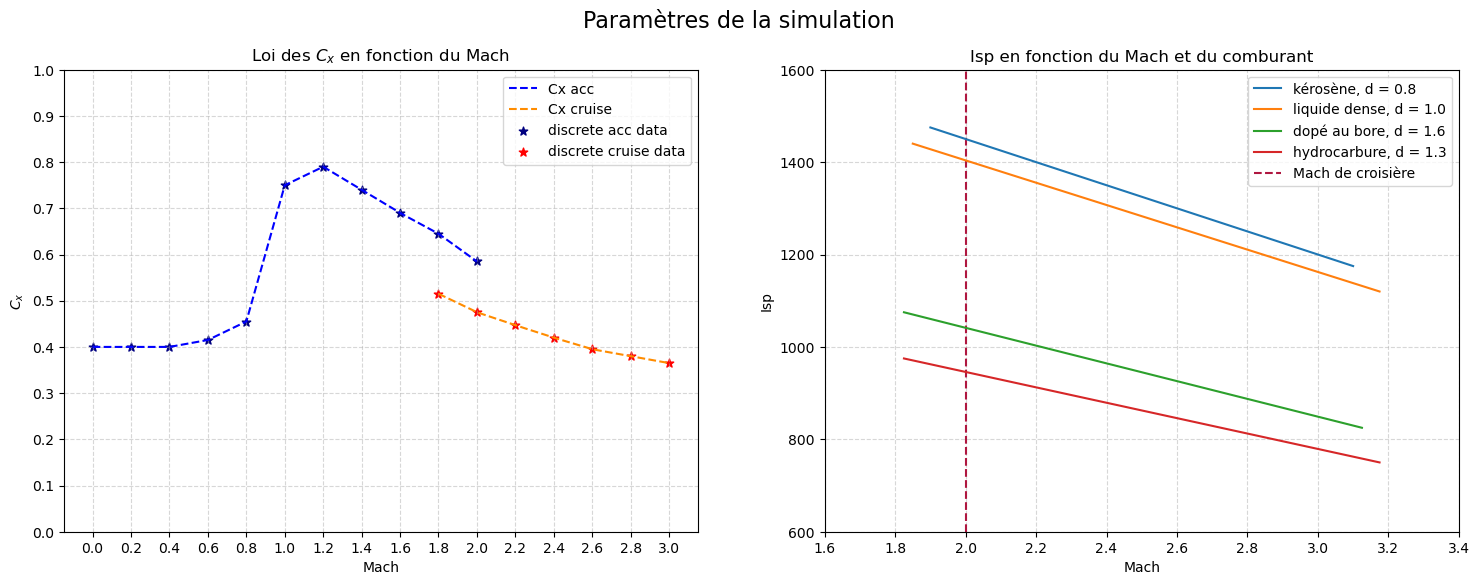

In [ ]:
# Données pour le Cx en fonction du Mach
Mach_acc_dis = np.array([0.0, 0.2, 0.4, 0.6, 0.8, 1.0, 1.2, 1.4, 1.6, 1.8, 2.0])
Cx_acc_dis = np.array([0.4, 0.4, 0.4, 0.415, 0.455, 0.75, 0.79, 0.74, 0.69, 0.645, 0.585])
interpolation_acc = interp1d(Mach_acc_dis, Cx_acc_dis, kind='linear')
Mach_acc_arr = np.linspace(Mach_acc_dis.min(), Mach_acc_dis.max(), shape)
Cx_acc_arr = interpolation_acc(Mach_acc_arr)

Mach_cruise_dis = np.array([1.8, 2.0, 2.2, 2.4, 2.6, 2.8, 3.0])
Cx_cruise_dis = np.array([0.515, 0.475, 0.447, 0.42, 0.395, 0.38, 0.365])
interpolation_cruise = interp1d(Mach_cruise_dis, Cx_cruise_dis, kind='linear')
Mach_cruise_arr = np.linspace(Mach_cruise_dis.min(), Mach_cruise_dis.max(), shape)
Cx_cruise_arr = interpolation_cruise(Mach_cruise_arr)

idx = np.argmin(np.abs(Mach_cruise_arr - 2.0))
Cd_c = Cx_cruise_arr[idx]

# Données pour l'Isp en fonction du Mach
Mach_kerosene_dis = np.array([1.9, 3.1])
Isp_kerosene_dis = np.array([1475, 1175])
Mach_liquide_dense_dis = np.array([1.85, 3.175])
Isp_liquide_dense_dis = np.array([1440, 1120])
Mach_bore_dis = np.array([1.825, 3.125])
Isp_bore_dis = np.array([1075, 825])
Mach_hydrocarbure_dis = np.array([1.825, 3.175])
Isp_hydrocarbure_dis = np.array([975, 750])

# Interpolation
nbr_point = 1000
Mach_kerosene = np.linspace(Mach_kerosene_dis[0], Mach_kerosene_dis[1], nbr_point)
Isp_kerosene = np.linspace(Isp_kerosene_dis[0], Isp_kerosene_dis[1], nbr_point)
Mach_liquide = np.linspace(Mach_liquide_dense_dis[0], Mach_liquide_dense_dis[1], nbr_point)
Isp_liquide = np.linspace(Isp_liquide_dense_dis[0], Isp_liquide_dense_dis[1], nbr_point)
Mach_bore = np.linspace(Mach_bore_dis[0], Mach_bore_dis[1], nbr_point)
Isp_bore = np.linspace(Isp_bore_dis[0], Isp_bore_dis[1], nbr_point)
Mach_hydrocarbure = np.linspace(Mach_hydrocarbure_dis[0], Mach_hydrocarbure_dis[1], nbr_point)
Isp_hydrocarbure = np.linspace(Isp_hydrocarbure_dis[0], Isp_hydrocarbure_dis[1], nbr_point)

fig, axes = plt.subplots(1, 2, figsize=(18, 6))
fig.suptitle("Paramètres de la simulation", fontsize=16)

axes[0].scatter(Mach_acc_dis, Cx_acc_dis, s=40, marker="*", color="navy", label="discrete acc data")
axes[0].scatter(Mach_cruise_dis, Cx_cruise_dis, s=40, marker="*", color="red", label="discrete cruise data")
axes[0].plot(Mach_acc_arr, Cx_acc_arr, color="blue", linestyle="--", label="Cx acc")
axes[0].plot(Mach_cruise_arr, Cx_cruise_arr, color="darkorange", linestyle="--", label="Cx cruise")
axes[0].grid(True, alpha=0.5, linestyle='--')
axes[0].legend(loc="upper right")
axes[0].set_xlabel("Mach")
axes[0].set_ylabel(r"$C_x$")
axes[0].set_ylim([0.0, 1.0])
axes[0].set_xticks(np.arange(0, 3.2, 0.2))
axes[0].set_yticks(np.arange(0, 1.1, 0.1))
axes[0].set_title("Loi des $C_x$ en fonction du Mach")

MACH_arr = [Mach_kerosene, Mach_liquide, Mach_bore, Mach_hydrocarbure]
ISP_arr = [Isp_kerosene, Isp_liquide, Isp_bore, Isp_hydrocarbure]
LABEL_arr = ["kérosène, d = 0.8", "liquide dense, d = 1.0", "dopé au bore, d = 1.6", "hydrocarbure, d = 1.3"]

for mach, isp, label in zip(MACH_arr, ISP_arr, LABEL_arr):
    axes[1].plot(mach, isp, label=label)
axes[1].vlines(x=2.0, ymin=600, ymax=1600, linestyle="--", color="#AF1740", label="Mach de croisière")
axes[1].grid(True, alpha=0.5, linestyle="--")
axes[1].legend(loc="upper right")
axes[1].set_xlim([1.6, 3.4])
axes[1].set_ylim([600, 1600])
axes[1].set_xlabel("Mach")
axes[1].set_ylabel("Isp")
axes[1].set_title("Isp en fonction du Mach et du comburant")

fig_path = os.path.join(img_path, "Parametres de simulation.jpg")
plt.savefig(fig_path, dpi=300, bbox_inches='tight', quality=95)
plt.show()

isp_value = np.zeros(4)
densite_value = [800, 1000, 1600, 1300]
for idx, (mach_arr, isp_array) in enumerate(zip(MACH_arr, ISP_arr)):
    isp_idx = np.argmin(np.abs(mach_arr - Mach_cruise))
    isp_value[idx] = np.round(isp_array[isp_idx], 2)

# stockage des valeurs
keys_dict_sub = np.array(["Impulsion Spécifique", "Masse volumique"])
values_dict_sub = np.array([(isp, rho) for isp, rho in zip(isp_value, densite_value)])

keys_dict_main = np.array(["Kerosene", "Liquide dense", "Bore", "Hydrocarbure"])

cruise_data_dict = {
    key: {
        keys_dict_sub[0]: values[0], 
        keys_dict_sub[1]: values[1], 
    }
    for key, values in zip(keys_dict_main, values_dict_sub)
}

In [ ]:
## ----- FUNCTION ----- ##
m_cp_fnc = lambda d_m, Isp_c: 1.1 * np.divide(np.pi * gamma * P_amb * Cd_c * Mach_cruise**2 * d_m**2, 8 * Isp_c * g0) * t_cruise

m_r_fnc = lambda i, m_p: np.divide(i * m_p, 1 - i)

alpha_fnc = lambda K_val: np.divide((1 + K_val) * Delta_Vr, Isp_acc * g0)

m_t_fnc = lambda alpha_val, sum_mass: sum_mass / (1 - np.divide(np.exp(alpha_val) - 1, np.exp(alpha_val)) * np.divide(1, 1 - i_a)) 

m_ap_fnc = lambda alpha_val, m_t_val: np.divide(np.exp(alpha_val) - 1, np.exp(alpha_val)) * m_t_val

L_prop_fnc = lambda m_i, rho_i, d_m: np.divide(4 * m_i, np.pi * rho_i * d_m**2)

L_res_fnc = lambda m_i, rho_i, d_m, c_i: np.divide(4 * m_i, np.pi * rho_i * d_m**2 * c_i)

def K_prime_expression(d_m, mass_fnc_t):
    cst_term = (np.pi * gamma * P_amb * d_m**2) / (8 * Delta_Vr)
    integrand = (Cx_acc_arr * Mach_acc_arr**2) / mass_fnc_t
    K_prime = cst_term * trapz(integrand, t_acc_arr)
    return K_prime

## ----- CODE ----- ##
nbr_oxydizer = keys_dict_main.shape[0]

mass_tensor = np.zeros((nbr_oxydizer, shape, 7))
length_tensor = np.zeros((nbr_oxydizer, shape, 8))
K_matrix = np.zeros((nbr_oxydizer, shape))

for idx_deph, data in enumerate(cruise_data_dict.values()):

    Isp_cruise = data["Impulsion Spécifique"]
    rho_cruise = data["Masse volumique"]

    for idx_row, d_m in enumerate(d_missile):

        ## ----- CONSTNATES DE LA SIMULATION ----- ##
        K = 0.1
        K_vec = [K]
        eps = 1
        count = 0

        ## ----- CALCUL DES MASSES ----- ##
            # masses PDF:ELISA_3
        # m_intakes = 35 + 250 * d_m**2
        # m_wings = 25 + 250 * d_m**2
            # masses PDF:projet_missile_stato
        m_intakes = 35 + 250 * d_m**2
        m_wings = 25 + 285 * d_m**2

        m_tot_empty = np.sum([m_ogive, m_equipement, m_tails, m_payload, m_engine_h, m_nozzle, m_intakes, m_wings])
        m_cp = m_cp_fnc(d_m=d_m, Isp_c=Isp_cruise)
        m_cr = m_r_fnc(i=i_c, m_p=m_cp)
        m_tot_cruise = m_tot_empty + m_cp + m_cr

        ## ----- CONVERGENCE AVEC PHASE ACCELERATION ----- ##
        while np.abs(eps) > 1e-5:
            
            K_prime = K_vec[-1]

            alpha = alpha_fnc(K_val=K_vec[-1])

            m_t = m_t_fnc(alpha_val=alpha, sum_mass=m_tot_cruise)

            m_ap = m_ap_fnc(alpha_val=alpha, m_t_val=m_t)

            m_ar = m_r_fnc(i=i_a, m_p=m_ap)

            m_tot = m_tot_cruise + m_ap + m_ar

            M_fnc_t = m_t - m_ap * (t_acc_arr/t_acc)

            K_prime = K_prime_expression(d_m=d_m, mass_fnc_t=M_fnc_t)
            K_vec.append(K_prime)
            
            eps = K_vec[-1] - K_vec[-2]
        
        ## ----- CALCUL DES LONGUEURS CARACTÉRISTIQUES DU MISSILE ----- ##
        L_acc_noz = 0.5 * d_m
        L_ogive = 3 * d_m
        L_payload = L_prop_fnc(m_i=m_payload, rho_i=rho_payload, d_m=d_m)
        L_equipement = L_prop_fnc(m_i=m_equipement, rho_i=rho_equipement, d_m=d_m)
        L_engine_housing = 0.5 * d_m
        L_cr = L_res_fnc(m_i=m_cp, rho_i=rho_c, d_m=d_m, c_i=c_c)
        L_ar = L_res_fnc(m_i=m_ap, rho_i=rho_a, d_m=d_m, c_i=c_a)

        ## ----- ASSIGNATION DES VALEURS DES LONGUEURS ----- ##
        length_tensor[idx_deph, idx_row, :7] = np.array([L_ogive, L_equipement, L_payload, L_engine_housing, L_cr, L_ar, L_acc_noz])
        length_tensor[idx_deph, idx_row, 7] = np.sum(length_tensor[idx_deph, idx_row, :7])

        ## ----- ASSIGNATION DES VALEURS DES MASSES ----- ##
        mass_tensor[idx_deph, idx_row, :6] = np.array([m_cp, m_cr, m_ap, m_ar, m_intakes, m_wings])
        mass_tensor[idx_deph, idx_row, 6] = mass_tensor[idx_deph, idx_row, :4].sum() + m_tot_empty

        ## ----- ASSIGNATION DE LA VALEUR DE K ----- ##
        K_matrix[idx_deph, idx_row] = K_vec[-1] 


In [ ]:
for keys_idx, key in enumerate(cruise_data_dict.keys()):
    
    data = {
        ## ----- caractéristiques du missiles ----- ##
        "d_m": d_missile,
        "L_m": length_tensor[keys_idx, :, 7],
        "m_m": mass_tensor[keys_idx, :, 6],

        ## ----- masses ----- ##
        "m_ogive": np.full(shape, m_ogive),
        "m_equipement": np.full(shape, m_equipement),
        "m_payload": np.full(shape, m_payload),
        "m_engine_housing": np.full(shape, m_engine_h),
        "m_nozzle": np.full(shape, m_nozzle),
        "m_tails": np.full(shape, m_tails),
        "m_cruise_prop": mass_tensor[keys_idx, :, 0],
        "m_cruise_res": mass_tensor[keys_idx, :, 1],
        "m_acc_prop": mass_tensor[keys_idx, :, 2],
        "m_acc_res": mass_tensor[keys_idx, :, 3],
        "m_intakes": mass_tensor[keys_idx, :, 4],
        "m_wings": mass_tensor[keys_idx, :, 5],

        ## ----- longueurs ----- ##
        "L_ogive": length_tensor[keys_idx, :, 0],
        "L_equipement": length_tensor[keys_idx, :, 1],
        "L_payload": length_tensor[keys_idx, :, 2],
        "L_engine_housing": length_tensor[keys_idx, :, 3],
        "L_nozzle": length_tensor[keys_idx, :, 6],
        "L_cruise_res": length_tensor[keys_idx, :, 4],
        "L_acc_res": length_tensor[keys_idx, :, 5],
        "L_cruise_prop": c_c * length_tensor[keys_idx, :, 4],
        "L_acc_prop": c_a * length_tensor[keys_idx, :, 5],

        ## ----- Caractéristiques Propulsives ----- ##
        "Impulsion spécifique": np.full(shape, isp_value[keys_idx]),
        "Masse volumique": np.full(shape, densite_value[keys_idx])
    }

    data_df = pd.DataFrame(data)
    df_path = os.path.join(resultats_path, f"{key}.csv")
    data_df.to_csv(df_path, index=False, sep="\t", float_format="%.5f")


<div class="alert alert-danger" align="center"><b>CRÉATION DES GRAPHIQUES</b></div>

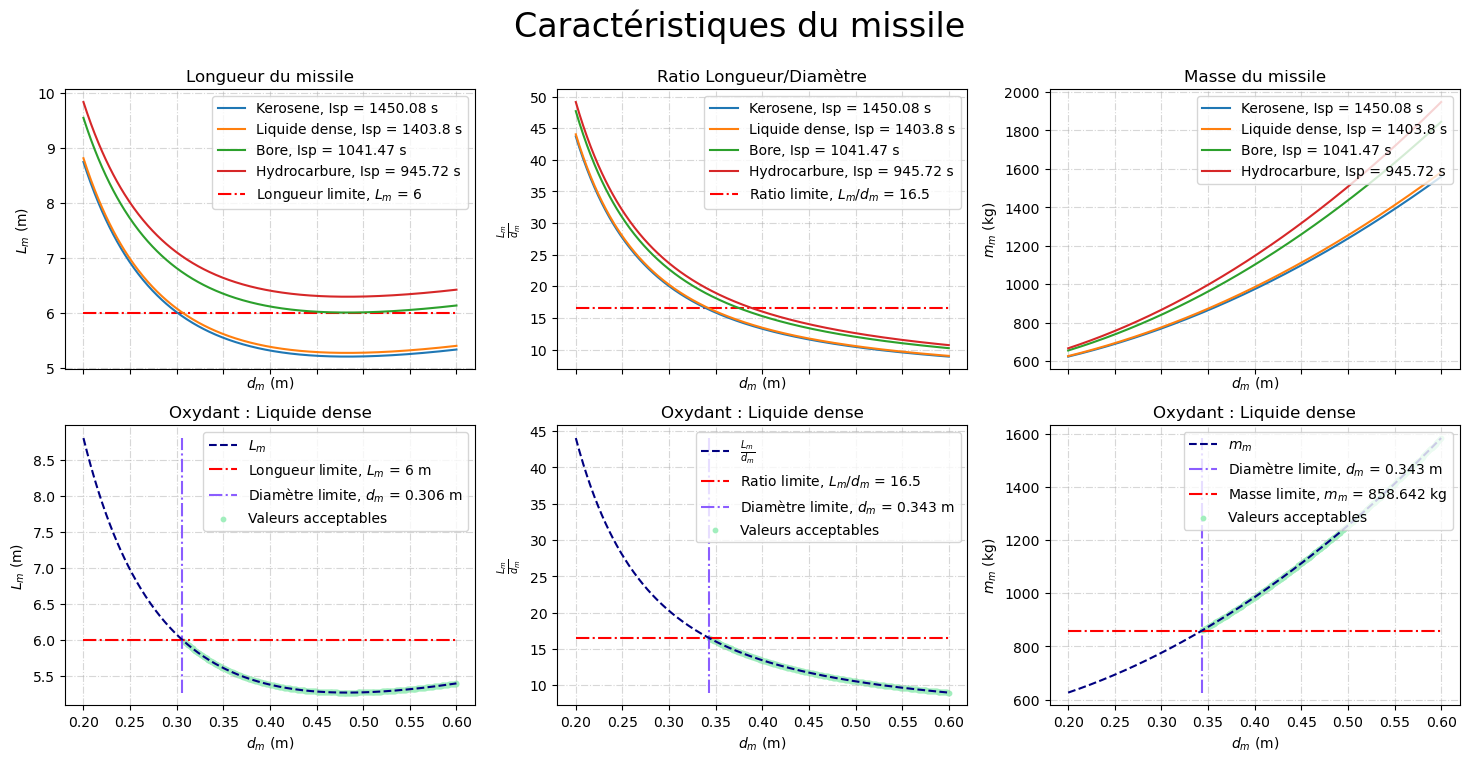

In [ ]:
# "Kerosene", "Liquide dense", "Bore", "Hydrocarbure"

## ----- DONNÉES ----- ##
choosen_oxydiser = "Liquide dense"
idx_choosen_oxydiser = np.where(keys_dict_main == choosen_oxydiser)[0][0]

max_length = 6
max_ratio = 16.5

fig, axs = plt.subplots(2, 3, figsize=(18, 8), sharex=True)
fig.suptitle("Caractéristiques du missile", fontsize=24)

# Définir les couleurs et styles
main_color = 'navy'
highlight_color = '#8B5DFF'
acceptable_color = '#A1EEBD'
limit_color = 'red'

# Pré-calculs
ratio = length_tensor[idx_choosen_oxydiser, :, 7] / d_missile
chosen_length = length_tensor[idx_choosen_oxydiser, :, 7]
chosen_mass = mass_tensor[idx_choosen_oxydiser, :, 6]

acceptable_Lm = np.where(length_tensor[idx_choosen_oxydiser, :, 7] < max_length)
acceptable_ratio = np.where(ratio < max_ratio)

idx_max_length = np.argmin(np.abs(length_tensor[idx_choosen_oxydiser, :, 7] - max_length))
idx_max_ratio = np.argmin(np.abs(ratio - max_ratio))

limite_idx = np.max(a=np.array([idx_max_length, idx_max_ratio]))
acceptable_mass = np.where(chosen_mass > chosen_mass[limite_idx])

# Liste des titres et étiquettes
titles = [
    "Longueur du missile",
    "Ratio Longueur/Diamètre",
    "Masse du missile",
    f'Oxydant : {choosen_oxydiser}',
    f'Oxydant : {choosen_oxydiser}',
    f'Oxydant : {choosen_oxydiser}'
]
ylabels = [
    r"$L_m$ (m)",
    r"$\frac{L_m}{d_m}$",
    r"$m_m$ (kg)",
    r"$L_m$ (m)",
    r"$\frac{L_m}{d_m}$",
    r"$m_m$ (kg)"
]

for idx, ax in enumerate(axs.flat):
    if idx == 0:
        # Longueur du missile
        for key_idx, key in enumerate(cruise_data_dict.keys()):
            ax.plot(d_missile, length_tensor[key_idx, :, 7], label=f'{key}, Isp = {isp_value[key_idx]} s')
        ax.hlines(y=max_length, xmin=d_missile.min(), xmax=d_missile.max(), color=limit_color, linestyle="-.", label=fr"Longueur limite, $L_m$ = {max_length}")

    elif idx == 1:
        # Ratio Longueur/Diamètre
        for key_idx, key in enumerate(cruise_data_dict.keys()):
            ax.plot(d_missile, length_tensor[key_idx, :, 7] / d_missile, label=f'{key}, Isp = {isp_value[key_idx]} s')
        ax.hlines(y=max_ratio, xmin=d_missile.min(), xmax=d_missile.max(), color=limit_color, linestyle="-.", label=fr"Ratio limite, $L_m/d_m$ = {max_ratio}")

    elif idx == 2:
        # Masse du missile
        for key_idx, key in enumerate(cruise_data_dict.keys()):
            ax.plot(d_missile, mass_tensor[key_idx, :, 6], label=f'{key}, Isp = {isp_value[key_idx]} s')

    elif idx == 3:
        # Longueur pour l'oxydant choisi
        ax.plot(d_missile, chosen_length, color=main_color, linestyle='--', label=r"$L_m$")
        ax.hlines(y=max_length, xmin=d_missile.min(), xmax=d_missile.max(), color=limit_color, linestyle='-.', label=fr"Longueur limite, $L_m$ = {max_length} m")
        ax.vlines(x=d_missile[idx_max_length], ymin=chosen_length.min(), ymax=chosen_length.max(), color=highlight_color, linestyle='-.', label=fr"Diamètre limite, $d_m$ = {d_missile[idx_max_length]:.3f} m")
        ax.scatter(d_missile[acceptable_Lm], chosen_length[acceptable_Lm], color=acceptable_color, s=10, marker='o', label="Valeurs acceptables")

    elif idx == 4:
        # Ratio Longueur/Diamètre pour l'oxydant choisi
        ax.plot(d_missile, ratio, color=main_color, linestyle='--', label=r"$\frac{L_m}{d_m}$")
        ax.hlines(y=max_ratio, xmin=d_missile.min(), xmax=d_missile.max(), color=limit_color, linestyle='-.', label=fr"Ratio limite, $L_m/d_m$ = {max_ratio}")
        ax.vlines(x=d_missile[idx_max_ratio], ymin=ratio.min(), ymax=ratio.max(), color=highlight_color, linestyle='-.', label=fr"Diamètre limite, $d_m$ = {d_missile[idx_max_ratio]:.3f} m")
        ax.scatter(d_missile[acceptable_ratio], ratio[acceptable_ratio], color=acceptable_color, s=10, marker='o', label="Valeurs acceptables")

    elif idx == 5:
        # Masse pour l'oxydant choisi
        ax.plot(d_missile, chosen_mass, color=main_color, linestyle='--', label=r"$m_m$")
        ax.vlines(x=d_missile[limite_idx], ymin=chosen_mass.min(), ymax=chosen_mass.max(), color=highlight_color, linestyle='-.', label=fr"Diamètre limite, $d_m$ = {d_missile[limite_idx]:.3f} m")
        ax.hlines(y=chosen_mass[limite_idx], xmin=d_missile.min(), xmax=d_missile.max(), color=limit_color, linestyle='-.', label=fr"Masse limite, $m_m$ = {chosen_mass[limite_idx]:.3f} kg")
        ax.scatter(d_missile[acceptable_mass], chosen_mass[acceptable_mass], color=acceptable_color, s=10, marker='o', label="Valeurs acceptables")

    # Configurations communes
    ax.set_title(titles[idx])
    ax.set_xlabel(r"$d_m$ (m)")
    ax.set_ylabel(ylabels[idx])
    ax.legend(loc='upper right')
    ax.grid("on", alpha=0.5, linestyle="-.")

# plt.tight_layout()
fig_path = os.path.join(img_path, "Caracteristiques_(2-3).jpg")
plt.savefig(fig_path, dpi=300, bbox_inches='tight', quality=95)
plt.show()

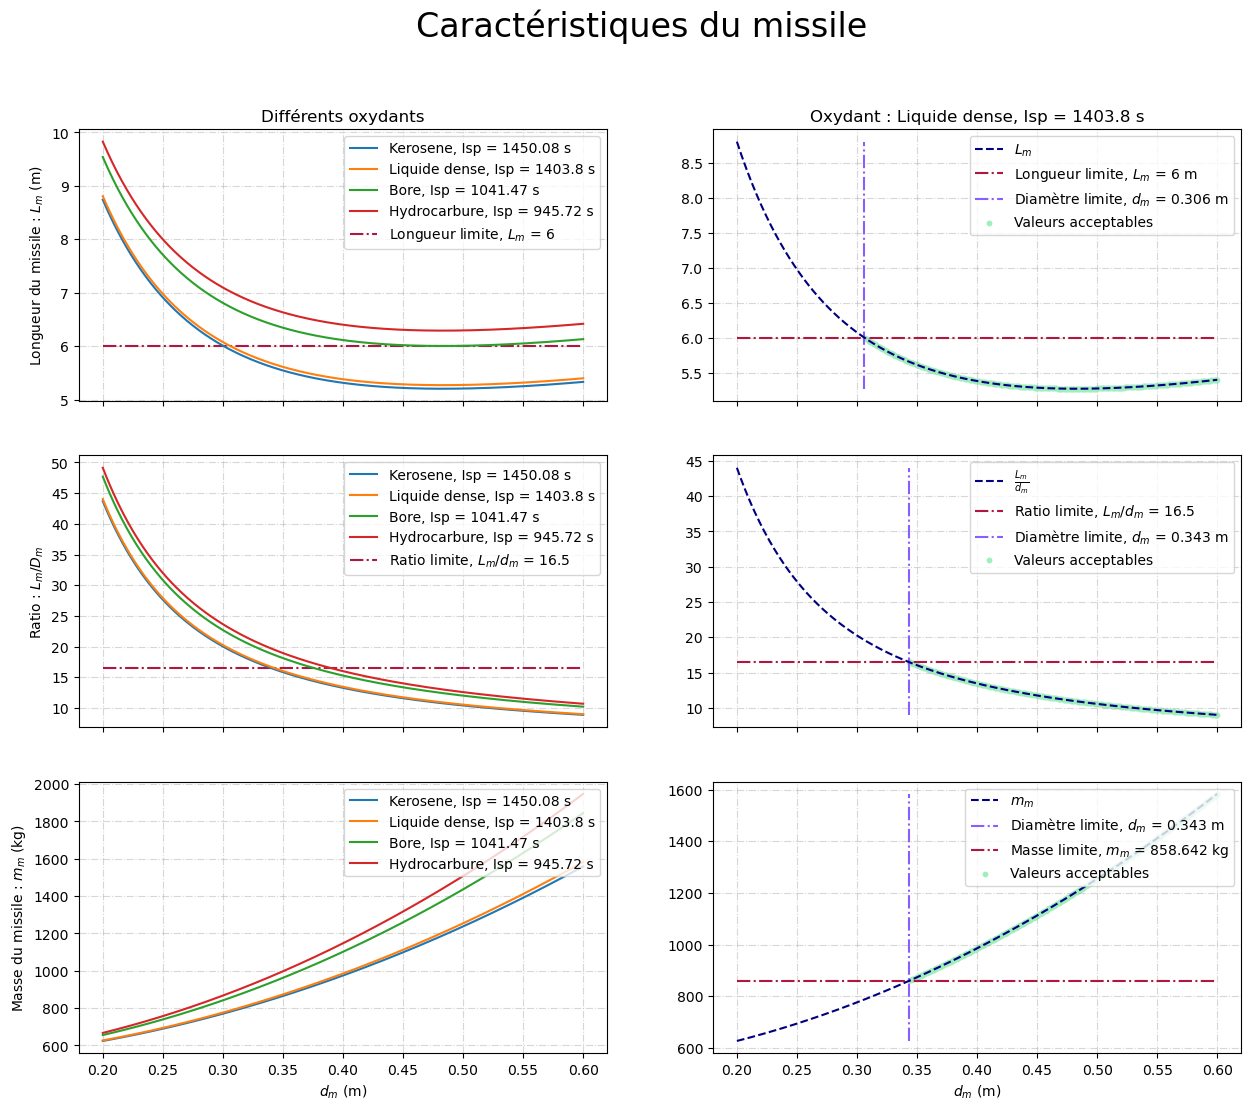

In [ ]:
# "Kerosene", "Liquide dense", "Bore", "Hydrocarbure"

## ----- DONNÉES ----- ##
choosen_oxydiser = "Liquide dense"
idx_choosen_oxydiser = np.where(keys_dict_main == choosen_oxydiser)[0][0]

max_length = 6
max_ratio = 16.5

fig, axs = plt.subplots(3, 2, figsize=(15, 12), sharex=True)
fig.suptitle("Caractéristiques du missile", fontsize=24)

# Définir les couleurs et styles
main_color = 'navy'
highlight_color = '#8B5DFF'
acceptable_color = '#A1EEBD'
limit_color = '#AF1740'

# Pré-calculs
ratio = length_tensor[idx_choosen_oxydiser, :, 7] / d_missile
chosen_length = length_tensor[idx_choosen_oxydiser, :, 7]
chosen_mass = mass_tensor[idx_choosen_oxydiser, :, 6]

acceptable_Lm = np.where(length_tensor[idx_choosen_oxydiser, :, 7] < max_length)
acceptable_ratio = np.where(ratio < max_ratio)

idx_max_length = np.argmin(np.abs(length_tensor[idx_choosen_oxydiser, :, 7] - max_length))
idx_max_ratio = np.argmin(np.abs(ratio - max_ratio))

limite_idx = np.max(a=np.array([idx_max_length, idx_max_ratio]))
acceptable_mass = np.where(chosen_mass > chosen_mass[limite_idx])

# Liste des titres et étiquettes
titles = [
    "Différents oxydants",
    f'Oxydant : {choosen_oxydiser}, Isp = {isp_value[idx_choosen_oxydiser]} s',
    "",
    "",
    "",
    "",
]

ylabels = [
    r"Longueur du missile : $L_m$ (m)",
    "",
    r"Ratio : $L_m/D_m$",
    "",
    r"Masse du missile : $m_m$ (kg)",
    "" 
]

for idx, ax in enumerate(axs.flat):

    if idx == 0:
        for key_idx, key in enumerate(cruise_data_dict.keys()):
            ax.plot(d_missile, length_tensor[key_idx, :, 7], label=f'{key}, Isp = {isp_value[key_idx]} s')
        ax.hlines(y=max_length, xmin=d_missile.min(), xmax=d_missile.max(), color=limit_color, linestyle="-.", label=fr"Longueur limite, $L_m$ = {max_length}")

    elif idx == 1:
        ax.plot(d_missile, chosen_length, color=main_color, linestyle='--', label=r"$L_m$")
        ax.hlines(y=max_length, xmin=d_missile.min(), xmax=d_missile.max(), color=limit_color, linestyle='-.', label=fr"Longueur limite, $L_m$ = {max_length} m")
        ax.vlines(x=d_missile[idx_max_length], ymin=chosen_length.min(), ymax=chosen_length.max(), color=highlight_color, linestyle='-.', label=fr"Diamètre limite, $d_m$ = {d_missile[idx_max_length]:.3f} m")
        ax.scatter(d_missile[acceptable_Lm], chosen_length[acceptable_Lm], color=acceptable_color, s=10, marker='o', label="Valeurs acceptables")

    elif idx == 2:
        for key_idx, key in enumerate(cruise_data_dict.keys()):
            ax.plot(d_missile, length_tensor[key_idx, :, 7] / d_missile, label=f'{key}, Isp = {isp_value[key_idx]} s')
        ax.hlines(y=max_ratio, xmin=d_missile.min(), xmax=d_missile.max(), color=limit_color, linestyle="-.", label=fr"Ratio limite, $L_m/d_m$ = {max_ratio}")

    elif idx == 3:
        ax.plot(d_missile, ratio, color=main_color, linestyle='--', label=r"$\frac{L_m}{d_m}$")
        ax.hlines(y=max_ratio, xmin=d_missile.min(), xmax=d_missile.max(), color=limit_color, linestyle='-.', label=fr"Ratio limite, $L_m/d_m$ = {max_ratio}")
        ax.vlines(x=d_missile[idx_max_ratio], ymin=ratio.min(), ymax=ratio.max(), color=highlight_color, linestyle='-.', label=fr"Diamètre limite, $d_m$ = {d_missile[idx_max_ratio]:.3f} m")
        ax.scatter(d_missile[acceptable_ratio], ratio[acceptable_ratio], color=acceptable_color, s=10, marker='o', label="Valeurs acceptables")

    elif idx == 4:
        for key_idx, key in enumerate(cruise_data_dict.keys()):
            ax.plot(d_missile, mass_tensor[key_idx, :, 6], label=f'{key}, Isp = {isp_value[key_idx]} s')
        ax.set_xlabel(r"$d_m$ (m)")

    elif idx == 5:
        ax.plot(d_missile, chosen_mass, color=main_color, linestyle='--', label=r"$m_m$")
        ax.vlines(x=d_missile[limite_idx], ymin=chosen_mass.min(), ymax=chosen_mass.max(), color=highlight_color, linestyle='-.', label=fr"Diamètre limite, $d_m$ = {d_missile[limite_idx]:.3f} m")
        ax.hlines(y=chosen_mass[limite_idx], xmin=d_missile.min(), xmax=d_missile.max(), color=limit_color, linestyle='-.', label=fr"Masse limite, $m_m$ = {chosen_mass[limite_idx]:.3f} kg")
        ax.scatter(d_missile[acceptable_mass], chosen_mass[acceptable_mass], color=acceptable_color, s=10, marker='o', label="Valeurs acceptables")
        ax.set_xlabel(r"$d_m$ (m)")

    ax.set_title(titles[idx])
    ax.set_ylabel(ylabels[idx])
    ax.legend(loc='upper right')
    ax.grid("on", alpha=0.5, linestyle="-.")

# plt.tight_layout()
fig_path = os.path.join(img_path, "Caracteristiques_(3-2).jpg")
plt.savefig(fig_path, dpi=300, bbox_inches='tight', quality=95)
plt.show()

<div class="alert alert-success" align="center"><b>CONFIGURATION DE NOTRE MISSILE</b></div>

In [ ]:
## ----- OXYDANT ----- ## 
# "Kerosene", "Liquide dense", "Bore", "Hydrocarbure"

oxydizer = "Liquide dense"
idx_chosen_oxydizer = np.where(keys_dict_main == oxydizer)[0]

## ----- CHARGEMENT DU FICHIER ----- ##
results_path = os.path.join(resultats_path, f"{oxydizer}.csv")
results_df = pd.read_csv(results_path, sep="\t")

## ----- CARCATÉRISTIQUES DU MISSILE ----- ##
diametre = 0.35
idx_diametre = np.argmin(np.abs(results_df['d_m'] - diametre))
row = results_df.iloc[idx_diametre]
row

d_m                        0.35000
L_m                        5.61160
m_m                      873.14334
m_ogive                   25.00000
m_equipement              55.00000
m_payload                200.00000
m_engine_housing          10.00000
m_nozzle                  12.00000
m_tails                   16.00000
m_cruise_prop            148.95414
m_cruise_res              42.01271
m_acc_prop               171.82007
m_acc_res                 66.81892
m_intakes                 65.62500
m_wings                   59.91250
L_ogive                    1.05000
L_equipement               0.38111
L_payload                  0.69292
L_engine_housing           0.17500
L_nozzle                   0.17500
L_cruise_res               1.72022
L_acc_res                  1.41735
L_cruise_prop              1.54820
L_acc_prop                 0.99215
Impulsion spécifique    1403.80000
Masse volumique         1000.00000
Name: 150, dtype: float64

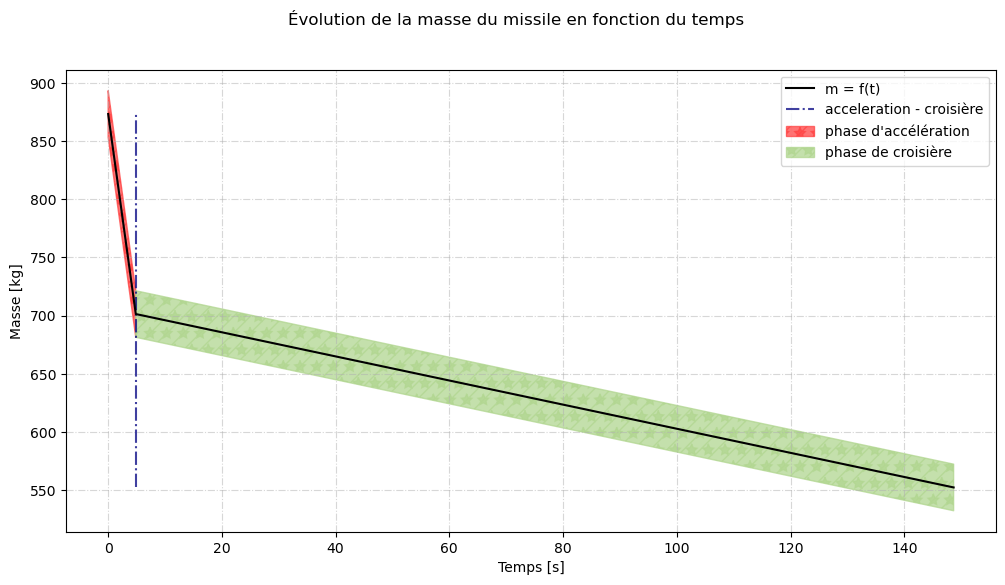

In [ ]:
mc_dot = row[9] / t_cruise
ma_dot = row[11] / t_acc

t_acc_array = np.linspace(0, t_acc, 1000)
t_cruise_array = np.linspace(0, t_cruise, 1000)

m_tot_missile_acc = row[2] - t_acc_array * ma_dot
m_tot_missile_cruise = m_tot_missile_acc[-1] - mc_dot * t_cruise_array

m_tot_array = np.concatenate((m_tot_missile_acc, m_tot_missile_cruise))
t_tot_array = np.concatenate((t_acc_array, t_cruise_array + t_acc))

fig, axs = plt.subplots(1, 1, figsize=(12, 6))
fig.suptitle('Évolution de la masse du missile en fonction du temps')

axs.plot(t_tot_array, m_tot_array, c='black', label=r'm = f(t)')
axs.vlines(x=t_acc, ymin=m_tot_array.min(), ymax=m_tot_array.max(), alpha=0.75, color='navy', linestyle='-.', label="acceleration - croisière")

val = 20
axs.fill_between(x=t_acc_array, y1=m_tot_missile_acc - val, y2=m_tot_missile_acc + val, alpha=0.75, hatch='/*/', color='#FF4545', label="phase d'accélération")
axs.fill_between(x=t_cruise_array + t_acc, y1=m_tot_missile_cruise - val, y2=m_tot_missile_cruise + val, alpha=0.75, hatch='/*/', color='#B1D690', label="phase de croisière")

axs.set_xlabel('Temps [s]')
axs.set_ylabel('Masse [kg]')
axs.grid('on', alpha=0.5, linestyle='-.')
axs.legend(loc="upper right")

fig_path = os.path.join(img_path, "Évolution de la masse.jpg")
plt.savefig(fig_path, dpi=300, bbox_inches='tight', quality=95)
plt.show()

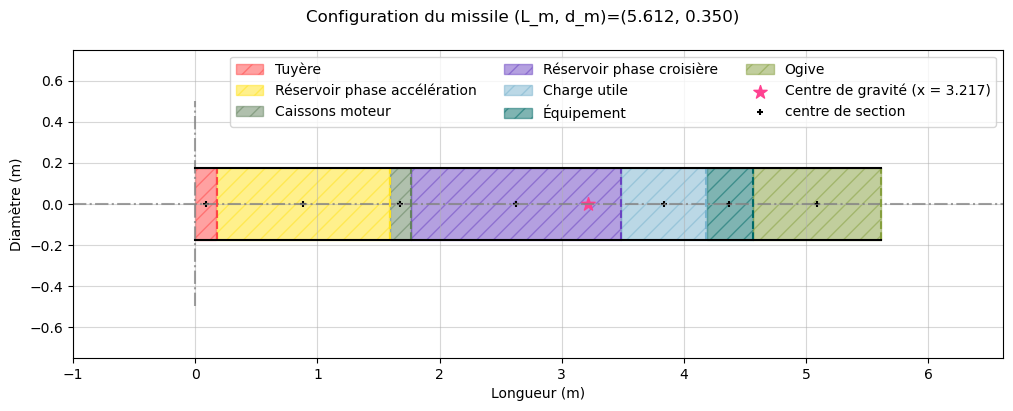

In [ ]:
# Paramètres
nbr_point = 1000
x_array = np.linspace(0, row["L_m"], nbr_point)
y_array = np.full(nbr_point, diametre / 2)
d_2 = diametre / 2

# Définition des sections et des couleurs
sections_CM = [
    ("Tuyère", row['L_nozzle'], row['m_nozzle'], "#FF4545"),
    ("Réservoir phase accélération", row["L_acc_res"], row['m_acc_res'], "#FFE31A"),
    ("Caissons moteur", row["L_engine_housing"], row['m_engine_housing'], "#62825D"),
    ("Réservoir phase croisière", row["L_cruise_res"], row["m_cruise_res"], "#6A42C2"),
    ("Charge utile", row["L_payload"], row["m_payload"], "#78B3CE"),
    ("Équipement", row["L_equipement"], row["m_equipement"], "#006A67"),
    ("Ogive", row["L_ogive"], row["m_ogive"], "#859F3D")
]

# Initialisation de la figure
fig, axs = plt.subplots(1, 1, figsize=(12, 4))
fig.suptitle(f"Configuration du missile (L_m, d_m)=({row['L_m']:.3f}, {diametre:.3f})")

# Dessin du contour du missile
axs.plot(x_array, y_array, c='black')
axs.plot(x_array, -y_array, c='black')
axs.hlines(y=0.0, xmin=-1.0, xmax=row['L_m'] + 1, alpha=0.75, color='gray', linestyles='-.')
axs.vlines(x=0.0, ymin=-0.5, ymax=0.5, alpha=0.75, color='gray', linestyles='-.')

# Ajout des sections
x_start = 0
for label, length, mass, color in sections_CM:
    x_end = x_start + length
    axs.vlines(x=x_end, ymin=-d_2, ymax=d_2, color=color, linestyles='--')
    axs.fill_between(x=x_array, y1=-d_2, y2=d_2, where=(x_array >= x_start) & (x_array <= x_end), color=color, alpha=0.5, hatch="//", label=label)
    x_start = x_end

x_pos_arr = np.zeros(shape=len(sections_CM))
mass_arr = np.zeros_like(x_pos_arr)

x_start, CG_num = 0, 0

for idx, (label, length, mass, color) in enumerate(sections_CM):

    x_pos = x_start + length/2

    mass_arr[idx] = mass
    x_pos_arr[idx] = x_pos
    CG_num += x_pos_arr[idx] * mass

    x_start += length

CG = CG_num / np.sum(mass_arr)
    
axs.scatter(CG, 0, marker="*", s=100, color='#FF4191', label=f"Centre de gravité (x = {CG:.3f})")
axs.scatter(x_pos_arr, np.full(x_pos_arr.shape[0], 0), marker="+", s=25, color='black', label="centre de section")

# Paramètres du graphique
axs.legend(loc="upper right", ncol=3)
axs.set_xlim([-1.0, row["L_m"] + 1.0])
axs.set_ylim([-0.75, 0.75])
axs.grid('on', alpha=0.5)

axs.set_xlabel('Longueur (m)')
axs.set_ylabel('Diamètre (m)')

missile_path = os.path.join(img_path, 'missile.jpg')
plt.savefig(missile_path, dpi=300, bbox_inches='tight', quality=95)
plt.show()

Évolution du centre de gravité :
   - Position initiale --> x = 2.616
   - Position finale --> x = 3.217


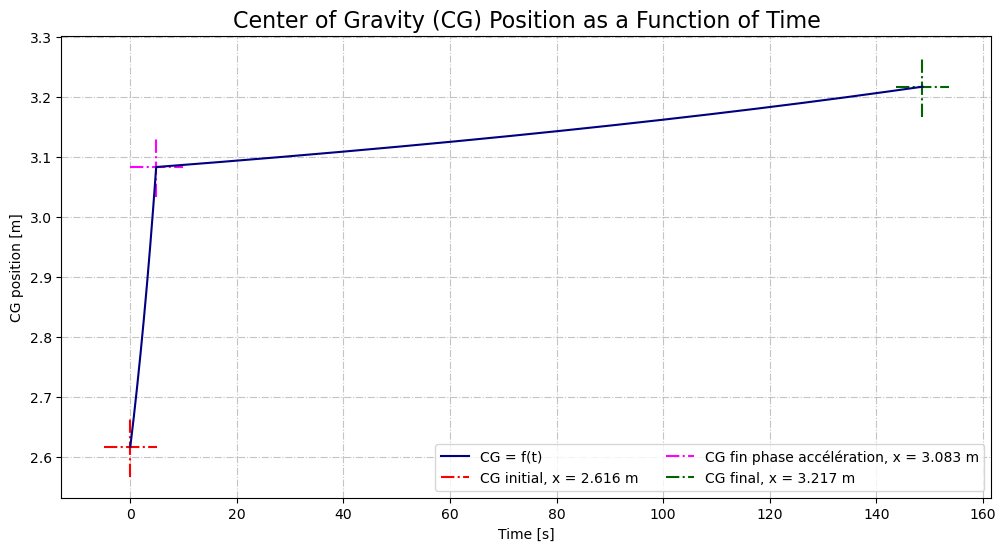

In [ ]:
sections_CM = [
    ("Tuyère", row['L_nozzle'], row['m_nozzle'], "#FF4545"),

    ("Réservoir phase accélération", row["L_acc_res"], row['m_acc_res'], "#FFE31A"),
    ("Propergol phase accélération", row["L_acc_prop"], row["m_acc_prop"], "#FFE31A"),

    ("Caissons moteur", row["L_engine_housing"], row['m_engine_housing'], "#62825D"),

    ("Réservoir phase croisière", row["L_cruise_res"], row["m_cruise_res"], "#6A42C2"),
    ("Propergol phase croisière", row["L_cruise_prop"], row["m_cruise_prop"], "#6A42C2"),

    ("Charge utile", row["L_payload"], row["m_payload"], "#78B3CE"),
    ("Équipement", row["L_equipement"], row["m_equipement"], "#006A67"),
    ("Ogive", row["L_ogive"], row["m_ogive"], "#859F3D")
]

mass_arr = np.zeros(shape=(t_tot_array.shape[0], len(sections_CM)))
CG_x_arr = np.zeros(shape=t_tot_array.shape[0])
x_pos_arr = np.zeros(len(sections_CM)) 

for t_idx, t in enumerate(t_tot_array):

    x_start = 0
    CG_num = 0
    total_mass = 0

    for idx, (label, length, mass, color) in enumerate(sections_CM):

        if label == "Propergol phase accélération":

            mass_arr[t_idx, idx] = max(0, mass - ma_dot * t) if t < t_acc else 0
            Delta_L = x_start - length
            x_pos = Delta_L + length / 2  

        elif label == "Propergol phase croisière":

            mass_arr[t_idx, idx] = max(0, mass - mc_dot * (t - t_acc)) if t > t_acc else mass
            Delta_L = x_start - length
            x_pos = Delta_L + length / 2  

        else:

            x_pos = x_start + length / 2  
            mass_arr[t_idx, idx] = mass
            x_start += length  
            
        x_pos_arr[idx] = x_pos
        CG_num += x_pos * mass_arr[t_idx, idx]

    
    CG_x_arr[t_idx] = CG_num / np.sum(mass_arr[t_idx, :])

print(f"{colored('Évolution du centre de gravité :', 'yellow')}\n   - Position initiale --> x = {CG_x_arr[0]:.3f}\n   - Position finale --> x = {CG_x_arr[-1]:.3f}")

fig, axs = plt.subplots(1, 1, figsize=(12, 6))

axs.plot(t_tot_array, CG_x_arr, color='navy', label="CG = f(t)")

axs.vlines(x=t_tot_array[0], ymin=CG_x_arr[0] - 0.05, ymax=CG_x_arr[0] + 0.05, linestyle='-.', color='red', label=f"CG initial, x = {CG_x_arr[0]:.3f} m")
axs.hlines(y=CG_x_arr[0], xmin=t_tot_array[0] - 5, xmax=t_tot_array[0] + 5, linestyle='-.', color='red')

axs.vlines(x=t_tot_array[1000], ymin=CG_x_arr[1000] - 0.05, ymax=CG_x_arr[1000] + 0.05, linestyle='-.', color='magenta', label=f"CG fin phase accélération, x = {CG_x_arr[1000]:.3f} m")
axs.hlines(y=CG_x_arr[1000], xmin=t_tot_array[1000] - 5, xmax=t_tot_array[1000] + 5, linestyle='-.', color='magenta')

axs.vlines(x=t_tot_array[-1], ymin=CG_x_arr[-1] - 0.05, ymax=CG_x_arr[-1] + 0.05, linestyle='-.', color='darkgreen', label=f"CG final, x = {CG_x_arr[-1]:.3f} m")
axs.hlines(y=CG_x_arr[-1], xmin=t_tot_array[-1] - 5, xmax=t_tot_array[-1] + 5, linestyle='-.', color='darkgreen')

axs.set_title("Center of Gravity (CG) Position as a Function of Time", fontsize=16)
axs.grid('on', alpha=0.75, linestyle='-.')
axs.set_xlabel("Time [s]")
axs.set_ylabel("CG position [m]")
axs.legend(loc='lower right', ncol=2)

CG_graph_path = os.path.join(img_path, "CG_position.jpg")
plt.savefig(CG_graph_path, dpi=300, bbox_inches='tight', quality=95)
plt.show()

TypeError: __init__() missing 1 required positional argument: 'func'

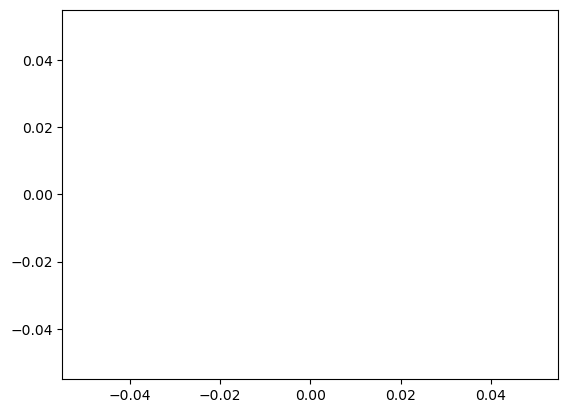

In [ ]:
from matplotlib.animation import FuncAnimation

t = np.linspace(0, 10, 100)
y = np.sin(t)

fig, axis = plt.subplots()

animated_plot = axis.plot()

def update_data(frame):
    
    return

animation = FuncAnimation(
    fig=fig,
)